### Legend
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import seaborn

In [2]:
try:
    data = pd.read_csv('../db.tst/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')



In [4]:
data.head(2)
data.sample(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10989,10,3000000.0,62.0,2017-08-29T00:00:00,3,2.5,9.0,46.0,9,NaN,...,6.0,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,210.0
14788,7,2300000.0,41.7,2017-02-14T00:00:00,1,NaN,5.0,17.5,3,NaN,...,9.0,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,48.0


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [65]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


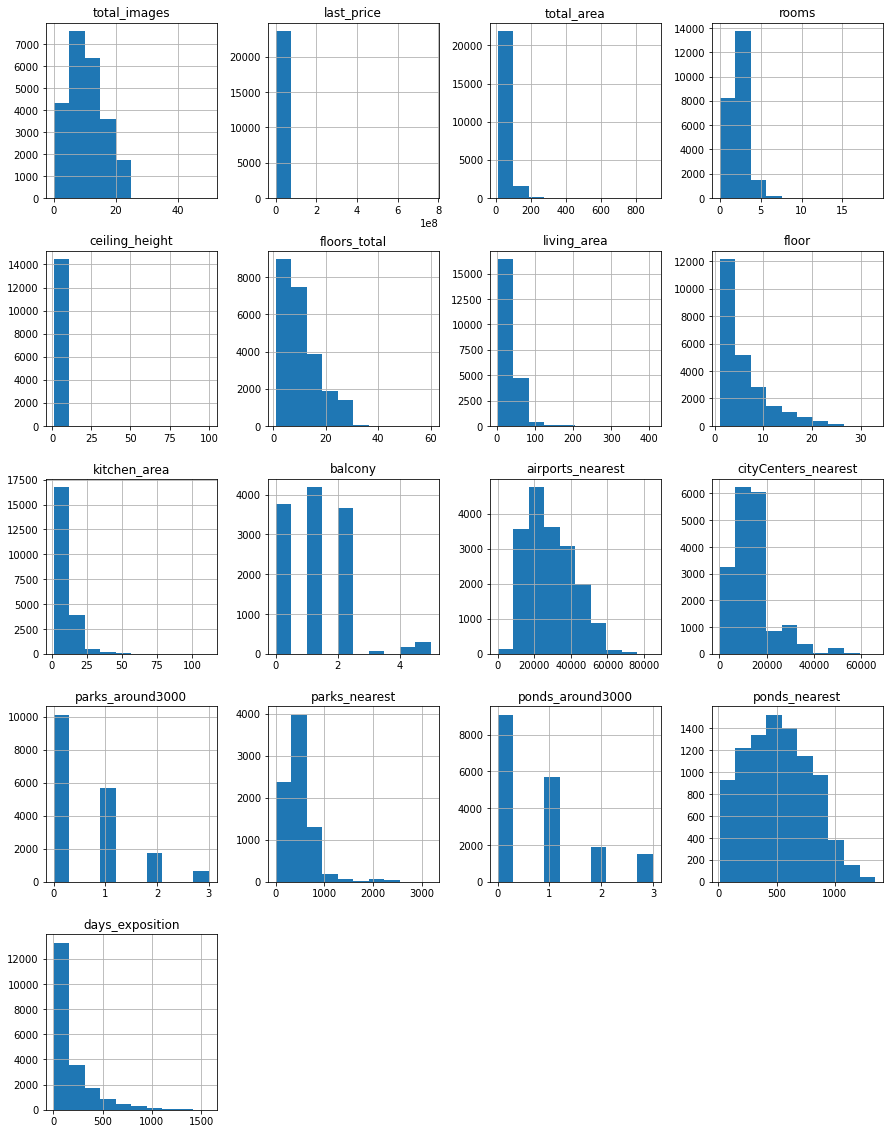

In [66]:
data.hist(figsize=(15, 20));

## Null data and duplicates

In [35]:
data.isna().agg(['sum', 'mean']).T.sort_values(by='sum', ascending=False)

,sum,mean
is_apartment,20924.0,0.882906
parks_nearest,15620.0,0.659100
ponds_nearest,14589.0,0.615596
balcony,11519.0,0.486054
ceiling_height,9195.0,0.387991
airports_nearest,5542.0,0.233850
cityCenters_nearest,5519.0,0.232879
ponds_around3000,5518.0,0.232837
parks_around3000,5518.0,0.232837
days_exposition,3181.0,0.134225


In [22]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

## Preprocessing of locoal area names

In [68]:
con2 = data['locality_name'].isna()
data.loc[con2, 'locality_name'].shape  #49 with NaN - float/ None - NoneType

#data.loc[con2, 'locality_name'] = data.loc[con2, 'locality_name'].fillna('no value')

(49,)

In [69]:
data[con2].sort_values('last_price', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22474,7,24000000.0,128.0,2015-07-24T00:00:00,4,2.75,6.0,68.40,6,False,...,16.50,0.0,NaN,23297.0,1780.0,3.0,277.0,3.0,561.0,436.0
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,NaN,3.0,NaN,1,NaN,...,41.60,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0
8568,10,16000000.0,155.0,2016-05-09T00:00:00,3,NaN,6.0,94.00,3,NaN,...,23.00,0.0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0


In [7]:
#data = data.dropna(subset=['locality_name'])
data.dropna(subset=['locality_name'], inplace=True)

In [8]:
# replacing ё with е
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [9]:
# locality_name
data['locality_name'] = data['locality_name'].str.lower()

In [19]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [74]:
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

In [11]:
con3 = data['locality_name'].str.contains('рябово')
data.loc[con3, 'locality_name']

1611                     поселок рябово
3930     поселок городского типа рябово
6465                     поселок рябово
11118    поселок городского типа рябово
Name: locality_name, dtype: object

In [12]:
# replacing поселок рябово with поселок городского типа рябово
data['locality_name'] = data['locality_name'].str.replace('поселок рябово', 'поселок городского типа рябово')

In [13]:
con4 = data['locality_name'].str.contains('поселок')
data.loc[con4, 'locality_name'].value_counts()

поселок мурино               556
поселок шушары               440
поселок парголово            327
поселок бугры                114
городской поселок янино-1     68
                            ... 
поселок почап                  1
поселок гончарово              1
поселок севастьяново           1
поселок петро-славянка         1
поселок дзержинского           1
Name: locality_name, Length: 166, dtype: int64

## preprocessing Balcony field

In [14]:
con1 = data['balcony'].isna()

#data.loc[con1, 'balcony'] = data.loc[con1, 'balcony'].fillna(0, inplace=True)
data.loc[con1, 'balcony'].fillna(0, inplace=True)

In [15]:
data['balcony'].unique()
data.groupby('balcony')['balcony'].count()

balcony
0.0    3725
1.0    4187
2.0    3658
3.0      81
4.0     182
5.0     304
Name: balcony, dtype: int64

In [16]:
data['balcony'].value_counts()

1.0    4187
0.0    3725
2.0    3658
5.0     304
4.0     182
3.0      81
Name: balcony, dtype: int64

## Preprocessing ceiling_height 

In [17]:
con5 = data['ceiling_height'].isna()
data.loc[con5, 'ceiling_height']

1       NaN
2       NaN
3       NaN
5       NaN
6       NaN
         ..
23687   NaN
23690   NaN
23692   NaN
23695   NaN
23696   NaN
Name: ceiling_height, Length: 9160, dtype: float64

In [18]:
con6 = data['ceiling_height'] >= 10 # 8 метров высокие потолки
data['ceiling_height'].value_counts()

data.loc[con6, 'ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
24.0     1
26.0     1
14.0     1
20.0     1
22.6     1
27.5     1
10.3     1
100.0    1
Name: ceiling_height, dtype: int64

In [19]:
# Преобразуем слишком высокие потолки разделив на 10
data.loc[con6, 'ceiling_height'] /= 10


In [29]:
#data[con6]
data.loc[con6, 'ceiling_height']

355       2.50
3148      3.20
4643      2.50
4876      2.70
5076      2.40
5246      2.70
5669      2.60
5807      2.70
6246      2.50
9379      2.50
10773     2.70
11285     2.50
14382     2.50
15061     1.40
17496     2.00
17857     2.70
18545     2.50
20478     2.70
20507     2.26
21377     2.75
21824     2.70
22309     1.03
22336     3.20
22869    10.00
22938     2.70
Name: ceiling_height, dtype: float64

In [73]:
#median_celing =  data.groupby(['ceiling_height', 'locality_name'])['ceiling_height'].median()
# data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)
#data.groupby(['ceiling_height', 'locality_name'])['ceiling_height'].apply(lambda val: val.fillna(val.median()))
# data.groupby(['ceiling_height', 'locality_name'])['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

data['ceiling_height'].fillna(data.groupby('locality_name')['ceiling_height'].median(), inplace=True)


In [67]:
# def add_median(data):
#     """Заполнение пустых ceiling_height значением медианы одного города"""
#     median = data.ceiling_height.median()
#     data.loc[pd.isna(data.ceiling_height), 'ceiling_height'] = median
#     return data

# data = data.groupby('locality_name').apply(add_median())

In [79]:
data.query('ceiling_height.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter


In [80]:
con7 = data['ceiling_height'] < 2.4 # низкие потолки
data.loc[con7, 'ceiling_height'].value_counts()

2.00    12
2.30     4
2.34     1
1.20     1
2.20     1
1.40     1
1.75     1
2.25     1
2.26     1
1.03     1
1.00     1
Name: ceiling_height, dtype: int64

In [82]:
# квартир с высотой потолков 2 м - 12 шт, с высотой 2.3 - 4 шт, все остальные по 1 шт. 
# Все эти значений не стандартные и судя по минимальному количеству таких квартир они аномальные. 
# Поэтому удалим их 
data = data[~con7]

In [81]:
con9 = data['ceiling_height'] > 3.5
data.loc[con9, 'ceiling_height'].value_counts()

4.00     38
3.60     36
3.70     30
3.90     28
3.80     20
3.55     17
4.20     10
3.95      8
3.75      8
4.50      7
3.54      6
3.56      5
3.65      4
3.63      3
3.52      3
8.00      3
4.40      3
3.66      3
3.67      3
4.10      3
3.78      3
3.57      3
3.53      3
3.51      2
4.45      2
3.85      2
3.86      2
4.19      2
4.70      2
3.62      2
5.30      2
3.76      1
4.90      1
10.00     1
3.93      1
3.58      1
4.14      1
5.80      1
3.88      1
4.65      1
6.00      1
4.25      1
3.69      1
4.15      1
4.80      1
4.30      1
3.84      1
5.50      1
8.30      1
4.37      1
3.68      1
3.87      1
3.83      1
3.98      1
5.60      1
3.82      1
4.06      1
5.00      1
5.20      1
3.59      1
Name: ceiling_height, dtype: int64

In [88]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [12]:
data.groupby('floors_total')['ceiling_height'].count()

floors_total
1.0       10
2.0      215
3.0      399
4.0      789
5.0     3666
6.0      619
7.0      398
8.0      220
9.0     2557
10.0     750
11.0     109
12.0     853
13.0     117
14.0     343
15.0     225
16.0     865
17.0     503
18.0     275
19.0     134
20.0     156
21.0      65
22.0     141
23.0     196
24.0     217
25.0     523
26.0      54
27.0      72
28.0       9
29.0       1
33.0       0
34.0       1
35.0       8
36.0       2
37.0       1
52.0       1
60.0       1
Name: ceiling_height, dtype: int64

In [7]:
data[['floors_total', 'ceiling_height']].value_counts().unstack().fillna(0).sample(3)

ceiling_height,1.00,1.20,1.75,2.00,2.20,2.25,2.30,2.34,2.40,2.45,...,14.00,20.00,22.60,24.00,25.00,26.00,27.00,27.50,32.00,100.00
floors_total,,,,,,,,,,,,,,,,,,,,,
25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [17]:
data[['floors_total', 'ceiling_height']].value_counts().filter(like='9.0').unstack()

ceiling_height,2.50,2.60,2.55,2.70,2.65,2.80,2.75,2.57,2.56,3.00,...,3.05,2.00,2.30,2.47,2.48,2.61,2.79,2.89,2.96,3.01
floors_total,,,,,,,,,,,,,,,,,,,,,
9.0,1099.0,458.0,305.0,162.0,94.0,72.0,58.0,44.0,44.0,38.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19.0,3.0,8.0,1.0,24.0,7.0,22.0,34.0,1.0,NaN,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# tmp_floor = data[['floors_total', 'ceiling_height']]
# #tmp_floor.groupby('floors_total')['ceiling_height'].median()

# tmp_floor[tmp_floor['ceiling_height'].isna()]
# tmp_floor['celing_median'] = (tmp_floor['ceiling_height']/tmp_floor['floors_total']).median()
# tmp_floor

In [91]:
# 0.3
# con_celing_na = data['ceiling_height'].isna()
# data.loc[con_celing_na, 'ceiling_height'] = data['floors_total'] * 0.3

In [92]:
data[['floors_total', 'ceiling_height']]

,floors_total,ceiling_height
0,16.0,2.70
1,11.0,3.30
2,5.0,1.50
3,14.0,4.20
4,14.0,3.03
...,...,...
23694,5.0,3.70
23695,5.0,1.50
23696,3.0,0.90
23697,17.0,3.00


In [93]:
data.loc[data['ceiling_height'].isna(), 'ceiling_height']

186     NaN
237     NaN
457     NaN
671     NaN
1757    NaN
         ..
21273   NaN
21753   NaN
22656   NaN
22808   NaN
23590   NaN
Name: ceiling_height, Length: 76, dtype: float64

In [94]:
tmp_floor

,floors_total,ceiling_height,celing_median
0,16.0,2.70,0.288889
1,11.0,NaN,0.288889
2,5.0,NaN,0.288889
3,14.0,NaN,0.288889
4,14.0,3.03,0.288889
...,...,...,...
23694,5.0,3.70,0.288889
23695,5.0,NaN,0.288889
23696,3.0,NaN,0.288889
23697,17.0,3.00,0.288889


In [95]:

data[['floors_total', 'ceiling_height']].query('ceiling_height <= 3.5 and ceiling_height >= 2')
data[['floors_total', 'ceiling_height']].query('ceiling_height.isna()')


,floors_total,ceiling_height
186,NaN,NaN
237,NaN,NaN
457,NaN,NaN
671,NaN,NaN
1757,NaN,NaN
...,...,...
21273,NaN,NaN
21753,NaN,NaN
22656,NaN,NaN
22808,NaN,NaN


<AxesSubplot:>

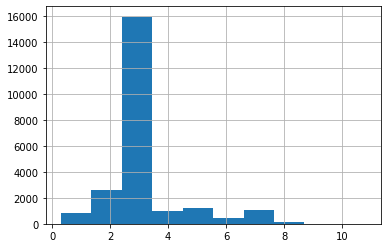

In [96]:
data.loc[~con9, 'ceiling_height'].hist()

In [97]:
# Отфильтруем все значения которые встречаются только 1 раз по высоте потолка
# data = data.groupby("ceiling_height").filter(lambda x: len(x) > 40)

## Floor total

In [18]:
data['floors_total'].value_counts().loc[:10]

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
Name: floors_total, dtype: int64

In [85]:
con10 = data['floors_total'].isna()

data[con10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.7,NaN,30.80,4,NaN,...,NaN,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,178527.61
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.7,NaN,20.75,1,NaN,...,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,86762.74
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.7,NaN,38.40,12,NaN,...,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,138253.50
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.7,NaN,47.10,8,NaN,...,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,64649.48
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.7,NaN,NaN,9,NaN,...,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,92307.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.8,NaN,NaN,3,NaN,...,NaN,санкт-петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,133858.27
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.7,NaN,31.70,20,NaN,...,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,70917.21
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.7,NaN,45.38,6,NaN,...,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,131967.96
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.7,NaN,50.40,18,NaN,...,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,171840.00


In [86]:
data = data[~con10]

## is_apartment

In [89]:
flats = ['is_apartment', 'studio', 'rooms', 'open_plan', 'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'total_area']
data.query('is_apartment.isna() and rooms == 0')
data.query('rooms == 0 and is_apartment == False')

data[flats].query('rooms == 0 and is_apartment == False')
data[flats].query('rooms > 0 and is_apartment == False')

#data.loc[839]

,is_apartment,studio,rooms,open_plan,ceiling_height,cityCenters_nearest,floor,floors_total,kitchen_area,living_area,total_area
11,False,False,2,False,2.55,51677.0,4,5.0,6.0,31.0,44.0
25,False,False,2,False,2.75,14640.0,18,23.0,15.0,39.0,76.0
29,False,False,3,False,2.70,11526.0,15,19.0,11.0,52.0,100.0
36,False,False,2,False,2.70,16461.0,9,9.0,6.3,27.0,45.0
41,False,False,3,False,2.70,12612.0,8,14.0,12.0,59.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...
23665,False,False,1,False,2.70,4946.0,1,6.0,14.6,18.2,47.0
23667,False,False,3,False,3.06,33272.0,9,17.0,11.0,55.0,90.0
23671,False,False,1,False,2.50,15261.0,4,9.0,7.5,17.5,35.3
23678,False,False,2,False,2.50,27977.0,2,3.0,4.9,26.1,43.0


In [3]:
data[flats].query('rooms > 0 and is_apartment == True').sample(3)

#data[flats].query('rooms == 0 and is_apartment == True')


NameError: name 'flats' is not defined

In [103]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [90]:
#data[['is_apartment', 'rooms']].query('rooms > 0 and is_apartment.isna()')['is_apartment'] = True
con11 = data['is_apartment'].isna()
con12 = data['rooms'] > 0
data.loc[con11 & con12, 'is_apartment'] = True

data[flats].query('is_apartment.isna() and rooms > 0 and open_plan==True')


,is_apartment,studio,rooms,open_plan,ceiling_height,cityCenters_nearest,floor,floors_total,kitchen_area,living_area,total_area


In [91]:
con13 = data['rooms'] == 0
data.loc[con11 & con13, 'is_apartment'] = False

In [ ]:
data[['is_apartment', 'rooms']].query('rooms > 0 and is_apartment.isna()')


,is_apartment,rooms


## kitchen_area

In [92]:
tmp = data[['is_apartment', 'studio', 'rooms', 'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'total_area']]

tmp['pre_total_area'] = tmp['kitchen_area'] + tmp['living_area']
tmp['rest_area'] = tmp['total_area'] - tmp['pre_total_area']
tmp['kitchen_proc_total'] = (tmp['kitchen_area']/tmp['total_area']).median()
tmp['kitchen_proc_living'] = (tmp['kitchen_area']/tmp['living_area']).median()
tmp

C:\Users\satfa\AppData\Local\Temp/ipykernel_17936/419926259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['pre_total_area'] = tmp['kitchen_area'] + tmp['living_area']
C:\Users\satfa\AppData\Local\Temp/ipykernel_17936/419926259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['rest_area'] = tmp['total_area'] - tmp['pre_total_area']
C:\Users\satfa\AppData\Local\Temp/ipykernel_17936/419926259.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,is_apartment,studio,rooms,ceiling_height,cityCenters_nearest,floor,floors_total,kitchen_area,living_area,total_area,pre_total_area,rest_area,kitchen_proc_total,kitchen_proc_living
0,True,False,3,2.70,16028.0,8,16.0,25.00,51.0,108.00,76.00,32.00,0.172365,0.301613
1,True,False,1,2.63,18603.0,1,11.0,11.00,18.6,40.40,29.60,10.80,0.172365,0.301613
2,True,False,2,2.70,13933.0,4,5.0,8.30,34.3,56.00,42.60,13.40,0.172365,0.301613
3,True,False,3,2.70,6800.0,9,14.0,NaN,NaN,159.00,NaN,NaN,0.172365,0.301613
4,True,False,2,3.03,8098.0,13,14.0,41.00,32.0,100.00,73.00,27.00,0.172365,0.301613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,True,False,3,3.70,4232.0,3,5.0,13.83,73.3,133.81,87.13,46.68,0.172365,0.301613
23695,True,False,3,2.50,NaN,4,5.0,8.50,38.0,59.00,46.50,12.50,0.172365,0.301613
23696,True,False,2,2.70,NaN,1,3.0,NaN,29.7,56.70,NaN,NaN,0.172365,0.301613
23697,True,False,2,3.00,10364.0,12,17.0,23.30,NaN,76.75,NaN,NaN,0.172365,0.301613


In [ ]:
(
    data[['is_apartment', 'studio', 'rooms', 'ceiling_height', 'cityCenters_nearest', 'floor', 'floors_total', 'kitchen_area', 'living_area', 'total_area']]
    .query('studio == True and kitchen_area.isna()')
)


,is_apartment,studio,rooms,ceiling_height,cityCenters_nearest,floor,floors_total,kitchen_area,living_area,total_area
697,False,True,0,2.75,NaN,21,25.0,NaN,17.5,24.1
716,False,True,0,2.70,29846.0,1,9.0,NaN,12.0,17.0
1174,False,True,0,2.70,8409.0,2,24.0,NaN,18.0,32.0
1220,False,True,0,2.80,12419.0,16,17.0,NaN,20.0,27.0
1260,False,True,0,2.70,NaN,4,16.0,NaN,16.0,27.0
...,...,...,...,...,...,...,...,...,...,...
22200,False,True,0,2.75,17256.0,17,23.0,NaN,19.6,27.7
22246,False,True,0,2.70,9551.0,15,16.0,NaN,23.3,27.3
22416,False,True,0,2.70,NaN,10,27.0,NaN,19.0,27.3
22832,False,True,0,2.60,22796.0,9,16.0,NaN,16.8,28.0


In [93]:
con_studio = data['studio'] == True
con_kitchen_area_na = data['kitchen_area'].isna()
data.loc[con_studio & con_kitchen_area_na, 'kitchen_area'] = 0

In [94]:
data.loc[~con_studio & con_kitchen_area_na, 'kitchen_area'] = data['total_area'] * 0.17

In [95]:
con_living_area_na = data['living_area'].isna()
data.loc[con_living_area_na, 'living_area'] = data['total_area'] * 0.57


## Преобразование дистанционных полей

- airports_nearest 2882
- cityCenters_nearest 2867
- parks_around3000 2866
- parks_nearest 8785
- ponds_around3000 2866
- ponds_nearest


In [96]:
(
    data[['locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest']]
    .query('airports_nearest.isna() or cityCenters_nearest.isna() or parks_around3000.isna() or parks_nearest.isna() or ponds_around3000.isna() or ponds_nearest.isna()')
)

,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest
1,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN
5,городской поселок янино-1,NaN,NaN,NaN,NaN,NaN,NaN
6,поселок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN
7,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN
8,поселок мурино,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
23691,санкт-петербург,19424.0,4489.0,0.0,NaN,1.0,806.0
23692,тихвин,NaN,NaN,NaN,NaN,NaN,NaN
23695,тосно,NaN,NaN,NaN,NaN,NaN,NaN
23696,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
# количество в пределах 3 км
con_parks3k = data['parks_around3000'].isna()
con_ponds3k = data['ponds_around3000'].isna()
data.loc[con_parks3k, 'parks_around3000'] = 0
data.loc[con_ponds3k, 'ponds_around3000'] = 0

In [98]:
con_airports_na = data['airports_nearest'].isna()
con_cityCenters_na = data['cityCenters_nearest'].isna()
con_parks_na = data['parks_nearest'].isna()
con_ponds_na = data['ponds_nearest'].isna()
data.loc[con_airports_na, 'airports_nearest'] = -1
data.loc[con_cityCenters_na, 'cityCenters_nearest'] = -1
data.loc[con_parks_na, 'parks_nearest'] = -1
data.loc[con_ponds_na, 'ponds_nearest'] = -1

## days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [99]:
con_days_expo_na = data['days_exposition'].isna()
data.loc[con_days_expo_na, 'days_exposition'] = -1

### Duplicate serch

In [ ]:
data.shape

(13450, 22)

In [100]:
data.duplicated().sum()

0

## Смена типа данных / Change Data Type

In [101]:
data['is_apartment'] = data['is_apartment'].astype('bool')

In [102]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d %H:%M')

In [103]:
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

count        23540.0
mean       6543273.0
std       10916003.0
min          12190.0
25%        3407500.0
50%        4650000.0
75%        6799000.0
max      763000000.0
Name: last_price, dtype: float64

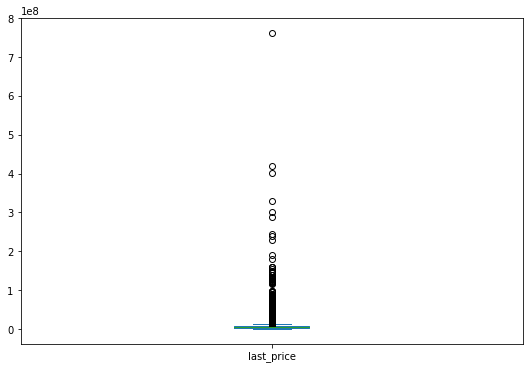

In [104]:
# Удаление выбросов
data['last_price'].plot(kind="box", figsize=(9,6));
data['last_price'].describe().round()

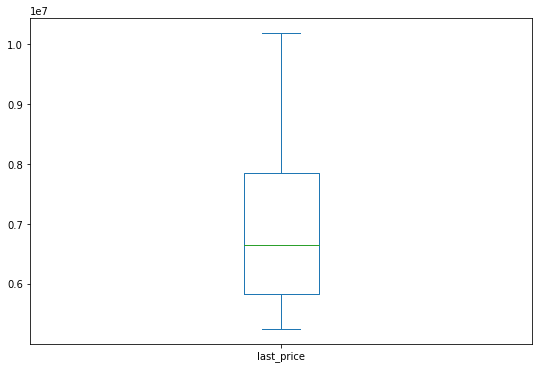

In [ ]:
data.query('last_price > 3498000*1.5 and last_price < 6800000*1.5')['last_price'].plot(kind="box", figsize=(9,6));

In [ ]:
data.query('last_price > 3498000*1.5 and last_price < 6800000*1.5')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.90,11.0,18.6,1,NaN,...,11.00,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5.0,34.3,4,NaN,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.80,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.85,5.0,38.0,4,NaN,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [105]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int32
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                        float64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
price_per_meter                float64
dtype: object

## Creating new columns

In [106]:
# last_price/total_area руб.м2

data['price_per_meter'] = (data['last_price']/data['total_area']).round(2)


In [107]:
data.sample(2)
prices = ['last_price', 'total_area', 'price_per_meter']
data[prices].sample(2)

,last_price,total_area,price_per_meter
10040,2570000.0,27.0,95185.19
7876,3000000.0,40.2,74626.87


In [108]:
# first_day_exposition — дата публикации
# "день недели публикации объявления"
# (0 — понедельник, 1 — вторник и так далее)

#data['first_day_exposition'].sample(2)

data['exposition_day_of_week'] = data['first_day_exposition'].dt.day_of_week

In [109]:
# Get month

data['exposition_month']= data['first_day_exposition'].dt.month
data['exposition_year']= data['first_day_exposition'].dt.year

In [110]:
data[['first_day_exposition', 'exposition_day_of_week', 'exposition_month', 'exposition_year']].sample(3)

,first_day_exposition,exposition_day_of_week,exposition_month,exposition_year
4370,2019-03-06,2,3,2019
914,2017-10-04,2,10,2017
4158,2017-05-16,1,5,2017


In [111]:
# тип этажа квартиры
# тип этажа квартиры (значения — первый», «последний», «другой»)

def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']

    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

In [112]:
data[['floor', 'floors_total', 'floor_type']].sample(3)

,floor,floors_total,floor_type
21605,13,24,другой
5550,1,3,первый
16699,5,9,другой


In [113]:
data['floor_type'].value_counts()

другой       17310
последний     3351
первый        2879
Name: floor_type, dtype: int64

In [114]:
# cityCenters_nearest

data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

In [115]:
data[['cityCenters_nearest', 'cityCenters_nearest_km']].sample(3)

,cityCenters_nearest,cityCenters_nearest_km
23036,-1.0,-0.0
11048,10430.0,10.0
4526,15847.0,16.0


## Data exploring

#### total_area — общая площадь квартиры в квадратных метрах (м²). Анализ

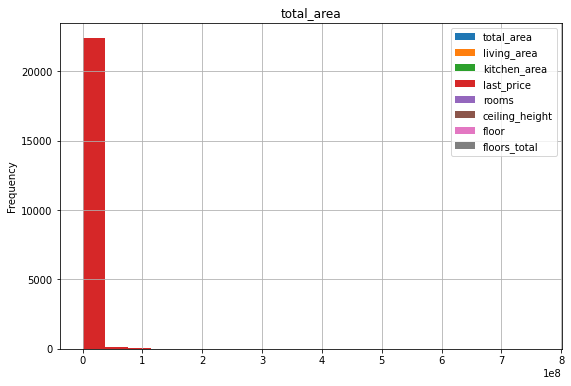

In [110]:
params = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floors_total']

for col in params:
    data[col].plot(kind='hist', bins=20, figsize=(9,6), title='total_area', grid=True, legend=True);

<AxesSubplot:>

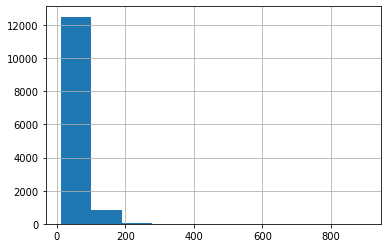

In [ ]:
data['total_area'].hist()

count    22546.000000
mean        59.017241
std         33.618443
min         12.000000
25%         40.000000
50%         51.000000
75%         68.000000
max        900.000000
Name: total_area, dtype: float64

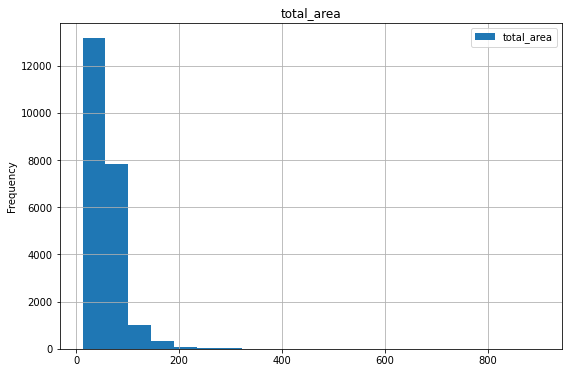

In [ ]:
data['total_area'].plot(kind='hist', bins=20, figsize=(9,6), title='total_area', grid=True, legend=True);
data['total_area'].describe()

In [ ]:
data['total_area'].describe().index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [ ]:
# IQR = Q3 - Q1
#  low_lim = Q1 - 1.5 * IQR
# up_lim = Q3 + 1.5 * IQR
q1_total_area = data['total_area'].describe()['25%']
q3_total_area = data['total_area'].describe()['75%']
iqr_total_area = q3_total_area - q1_total_area
low_lim_total_area = q1_total_area - 1.5 * iqr_total_area
up_lim_total_area = q3_total_area + 1.5 * iqr_total_area

print(low_lim_total_area, up_lim_total_area)

-2.0 110.0


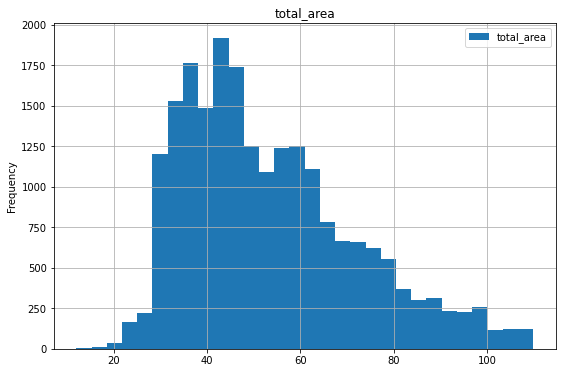

In [ ]:
data.query('@low_lim_total_area < total_area < @up_lim_total_area')['total_area'].plot(kind='hist', bins=30, figsize=(9,6), title='total_area', grid=True, legend=True);


In [ ]:
data['total_area'].value_counts(bins=6)
data[data['total_area'] > 160]['total_area'].value_counts()
data[data['total_area'] < 30]['total_area'].value_counts()

29.00    44
28.00    28
25.00    17
27.00    16
29.20    14
         ..
27.32     1
23.06     1
21.00     1
20.80     1
26.10     1
Name: total_area, Length: 90, dtype: int64

<pre>
Больше всего квартир с площадью от 12 до 60 м2. 
Площадь самой маленькой квартиры 12 м2.
Площадь самой большой квартиры 900 м2, но судя по графику таких квартир не много.
Начиная с площади 100 м2 это уже редко встречающиеся квартиры. Их меньше всего, так как они и намного дороже будут чем остальные квартиры.
</pre>

#### living_area — жилая площадь в квадратных метрах (м²)

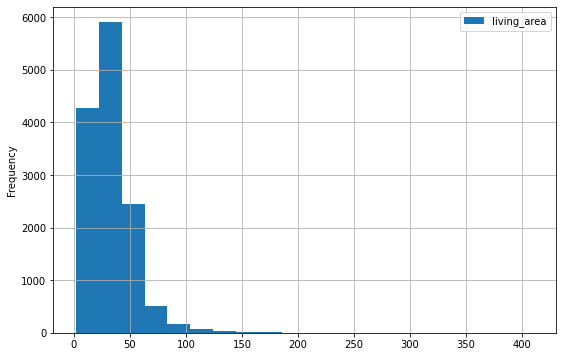

In [ ]:
data['living_area'].plot(kind='hist', bins=20, figsize=(9,6), grid=True, legend=True);

In [ ]:
data['living_area'].describe()

count    13450.000000
mean        34.316422
std         20.467981
min          2.000000
25%         19.000000
50%         30.100000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

<pre>
Наименьшая жилая площадь по данным это 2 м2. Очень маленькая, скорее всего неверные данные.
Самая максимальная жилая площадь 409 м2. Но все что больше 60 м2 уже редкие значения судя по графику.
Судя по графику пик от 30 до 40 м2, чаще всего встречаются в данных.
</pre>

#### kitchen_area — площадь кухни в квадратных метрах (м²)

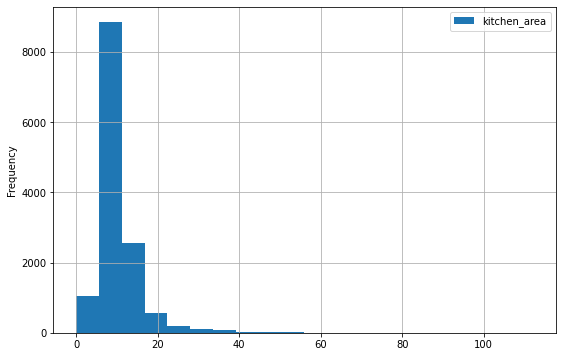

In [ ]:
data['kitchen_area'].plot(kind='hist', bins=20, figsize=(9,6), grid=True, legend=True);

In [ ]:
data['kitchen_area'].describe()

count    13450.000000
mean        10.247852
std          5.893653
min          0.000000
25%          7.000000
50%          9.000000
75%         11.500000
max        112.000000
Name: kitchen_area, dtype: float64

<pre>
Минимальная площадь судя по графику 0 м2, Но так мы обозначили студии, у которых отдельной кухни нет. Их получается около 1000 штук.
Пик выделяется на кухонной площади от 9 до 11 м2.
Начиная с 18 м2 начинаются квартиры, которые встречаются реже всего. 
Самая максимальная площадь кухни 112 м2, похоже на ошибку данных, так как очень большая площадь для кухни.
</pre>

####  last_price — цена на момент снятия с публикации

count        13450.0
mean       6329693.1
std        8597413.1
min          12190.0
25%        3500000.0
50%        4700000.0
75%        6700000.0
max      420000000.0
Name: last_price, dtype: float64

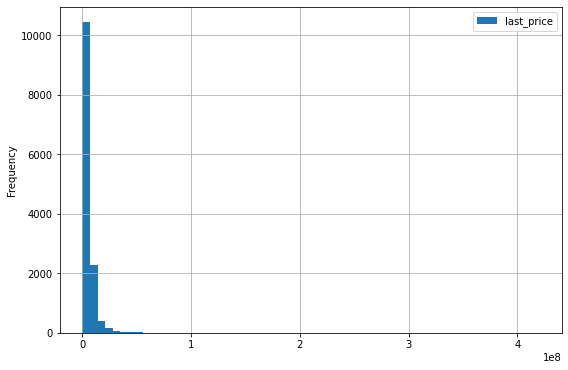

In [ ]:
data['last_price'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['last_price'].describe().round(decimals=2)

<pre>
Самая минимальная цена 12 190. Выглядит не реалистичной за квартиру. Цены в сновном начинаются от миллиона
Чаще всего встречаются квартиры с ценами в диапазоне от 4 700 000 до 6 700 000.
Самая высокая цена 420 000 000, скорее всего там очень большая площадь.
Те что за 6 миллионов уже встречаются редко.
Стандартное отклонение очень большое, значит есть сильно отлчающиеся значения.
</pre>

#### rooms — число комнат

count    13450.000000
mean         2.087212
std          1.045998
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

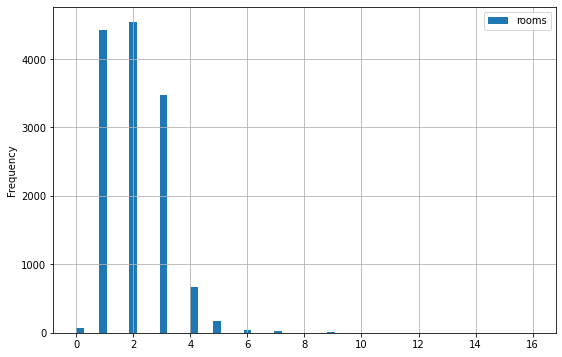

In [ ]:
data['rooms'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['rooms'].describe()

<pre>
Больше всего двух-комнатных квартир.
На втором месте однокомнатные.
1-3 квартиры входят в число самых популярных.
Начиная с 4 комнатных уже не так много.
Начиная с 6 комнатных ешще меньше. 
Те что обозначены 0 - безкомнат - это студии, и тоже очень мало.
Самое максимальное число комнат - 16.
</pre>

#### ceiling_height — высота потолков (м)

count    13450.000000
mean         2.694743
std          0.213957
min          2.500000
25%          2.500000
50%          2.640000
75%          2.780000
max          3.500000
Name: ceiling_height, dtype: float64

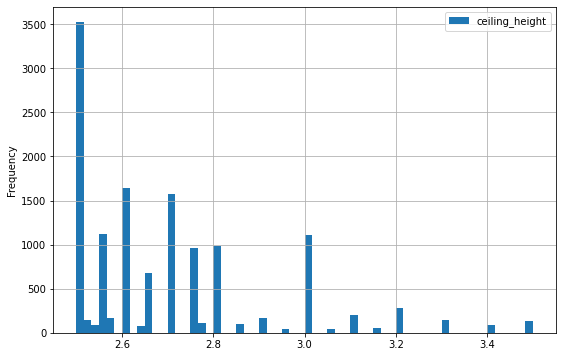

In [ ]:
data['ceiling_height'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['ceiling_height'].describe()

<pre>
Больше всего потолков высотой 2.5 м.
Тахже много потолков высотой 2.6, 2.7. Чуть меньше 2.8 и 3 м. 
Все остальные встречаются реже.
Самая максимальная высота потолков 3.5.
</pre>

#### floor — этаж

count    13450.000000
mean         5.671301
std          4.630923
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: floor, dtype: float64

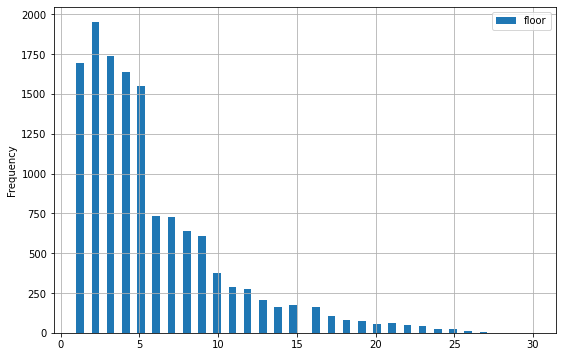

In [ ]:
data['floor'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['floor'].describe()

<pre>
Больше всего квартир на 2 этаже.
С 1 го по 5 этажы превышат количество квартир в 1500.
С 6го по 12 в диапазоне от 250 до 740 квартир.
Начиная с 13 квартиры уже встречаются реже и чем выше этаж тем меньше квартир.
</pre>

#### тип этажа квартиры («первый», «последний», «другой»);

count      13450
unique         3
top       другой
freq        9845
Name: floor_type, dtype: object

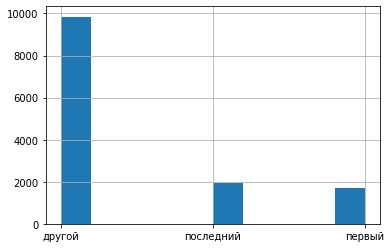

In [ ]:
# for not numeric type
data['floor_type'].hist()
data['floor_type'].describe()

<pre>
Чаще всего встречается квартиры между 1 и последним этажем.
На первом этаже квартир продают меньше всего.
</pre>

#### floors_total — всего этажей в доме

count    13450.000000
mean        10.314498
std          6.198058
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         52.000000
Name: floors_total, dtype: float64

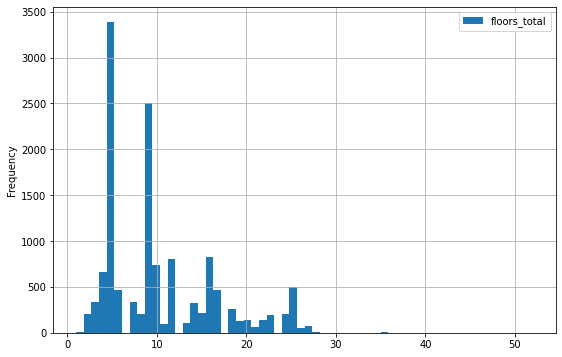

In [ ]:
data['floors_total'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['floors_total'].describe()

<pre>
Судя по графику много 9 этажек и 5 этажек. Больше 2400 квартир.
Самая минимальная этажность 1.
Самая максимальная 52 этажа.
Здания больше 25 этажей встречаются меньше вссего. 
Одноэтажек тоже не так много.
Остальные здания распределены не равноменрно.
</pre>

#### cityCenters_nearest — расстояние до центра города (м)

count    13450.000000
mean     11421.254944
std       9697.615870
min         -1.000000
25%       3871.250000
50%      11767.000000
75%      15361.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

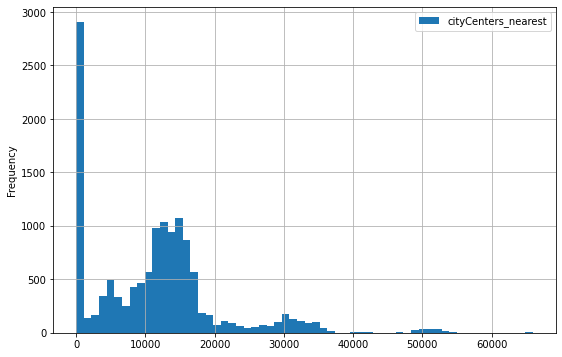

In [ ]:
data['cityCenters_nearest'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['cityCenters_nearest'].describe()

In [ ]:
without1 = data[data['cityCenters_nearest'] > 1]
without1['cityCenters_nearest'].describe()

count    17125.000000
mean     14449.364964
std       8532.768747
min        215.000000
25%       9734.000000
50%      13252.000000
75%      16407.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<pre>
-1 были помечены квартиры, у которых растояние до центра не было указано. Те что скорее всего либо находятся намного дальше от центра чем 70 тыс метров.
Либо это дефект данных. Но как раз это -1 возле 0.
График не равномерный.
Большой всплеск около 0.
Ьольшиство квартир, больше 800 шт находится в пределах от 11000 до 15 000 м.
Второй мини пик, больше 200 шт в пределах от 4 000 до 6 тыс.
Все остальные встречаются редко. 
</pre>

#### airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

count    13450.000000
mean     22834.887063
std      16477.656945
min         -1.000000
25%      11509.000000
50%      22317.500000
75%      35340.000000
max      84869.000000
Name: airports_nearest, dtype: float64

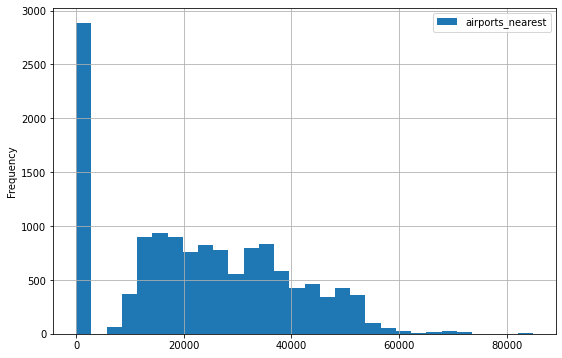

In [ ]:
data['airports_nearest'].plot(kind='hist', bins=30, figsize=(9,6), grid=True, legend=True);
data['airports_nearest'].describe()

<pre>
-1 возле 0 это записи где был пропуск в поле, значит нет ближайшего аэропорта.
Больше всего записей 500 шт ближайшие к аэропорту на растоянии 12 тыс м.
Не считая отдельные пики, с увеличением расстояния уменьшается количество квартир.
Самое максимальное расстояние 84 869
</pre>

#### parks_nearest — расстояние до ближайшего парка (м)

count    13450.000000
mean       166.018736
std        297.810897
min         -1.000000
25%         -1.000000
50%         -1.000000
75%        310.750000
max       3190.000000
Name: parks_nearest, dtype: float64

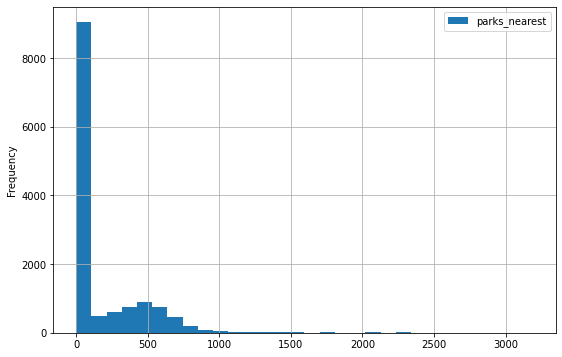

In [ ]:
data['parks_nearest'].plot(kind='hist', bins=30, figsize=(9,6), grid=True, legend=True);
data['parks_nearest'].describe()

<pre>
-1 около 0 записи в которых нет ближайшего парка.
Больше всего квартир в районе 400 - 500 метров.
Слева и справа количество иден на уменьшение.
Самое максимальное расстояние от парка 3190 метров.
</pre>

#### first_day_exposition — дата публикации
- День - 'exposition_day_of_week'
- Месяц - 'exposition_month'

count    13450.000000
mean         2.505056
std          1.793822
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          6.000000
Name: exposition_day_of_week, dtype: float64

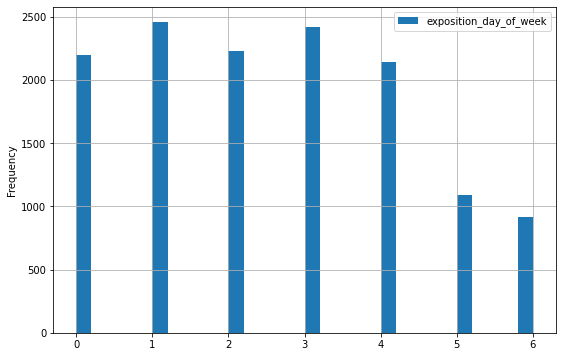

In [ ]:
data['exposition_day_of_week'].plot(kind='hist', bins=30, figsize=(9,6), grid=True, legend=True);
data['exposition_day_of_week'].describe()

<pre>
Больше всего обявлений публикуют по вторникам и четвергам.
В понедельник, в среду и в пятницу бубликуют примерно одинаково, но меньше чем по вторникам с четвергами.
В выходные публикуют не больше 1100 объявлений. 
</pre>

count    13450.000000
mean         6.312862
std          3.501712
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: exposition_month, dtype: float64

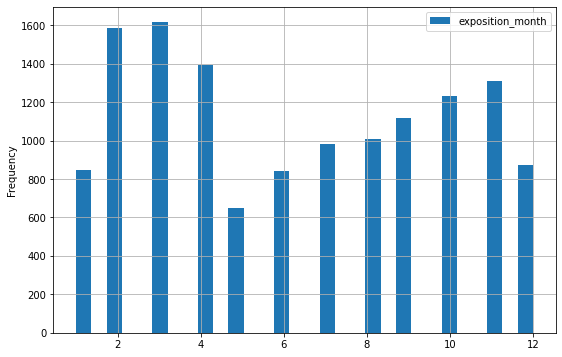

In [ ]:
data['exposition_month'].plot(kind='hist', bins=30, figsize=(9,6), grid=True, legend=True);
data['exposition_month'].describe()

<pre>
Больше всего объявлений 1500 - 1600 опубликована в феврале и марте.
Второй по величине пик в ноябре и октябре, больше 1200 публикаций.
В мае минимум и потом идет возрастание по публикациям до октября и снова спад.
</pre>

## Быстрота прродаж квартир, days_exposition
- гистограмма
- расчет среднего и медианы
- сколько времени в среднем занимает продажа
- какие продажи быстрые
- какие продажы необычно долгие 

count    13450.000000
mean       155.110706
std        216.679224
min         -1.000000
25%         17.000000
50%         70.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

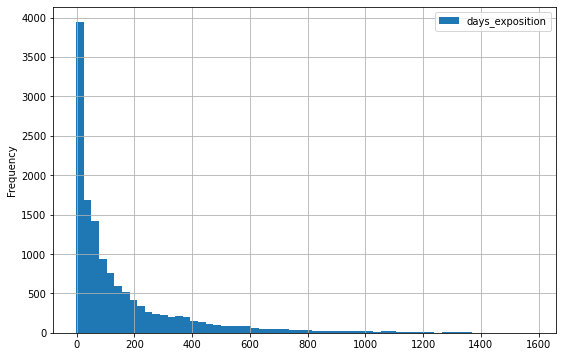

In [ ]:
data['days_exposition'].plot(kind='hist', bins=60, figsize=(9,6), grid=True, legend=True);
data['days_exposition'].describe()

In [ ]:
data['days_exposition'].median()

70.0

<pre>
Средняя арифметическая 155 дней, средняя медианная 70 дней.
-1 были помечены пустые значения и мы их приняли за незакрытие. И закрывать их не собирались, так как прошло больше нескольких лет с публикации.
Больше всего объявлений начиная от 17 до 70.
От 100 до 200 идет второй пик.
Есть зависимость что с увеличением дня закрытия уменьшается количество объявлений. 
То есть большинство объявлений закрываются до 100 дней. 
Совсем редкие начинаются от 600 дней.
Самое максимальное 1580 дней.
</pre>

## Зависимость цены от общей площади
- last_price — цена на момент снятия с публикации
- total_area — общая площадь квартиры в квадратных метрах (м²)

,last_price,total_area
last_price,1.000000,0.708929
total_area,0.708929,1.000000


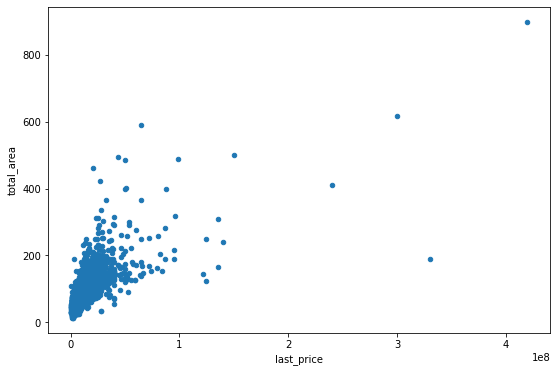

In [ ]:
data.plot(kind='scatter', x='last_price', y='total_area', figsize=(9,6));
data[['last_price', 'total_area']].corr()

<pre>
Есть явная зависимость цены от площади. 
Чем больше площадь, тем больше цена.
Но есть и точечные исключения, у которых плщадь такая же, 
но цена слишком завышена по сравнению с другим колличеством квартир с такой же площадью.
Корреляция = 0,7
</pre>

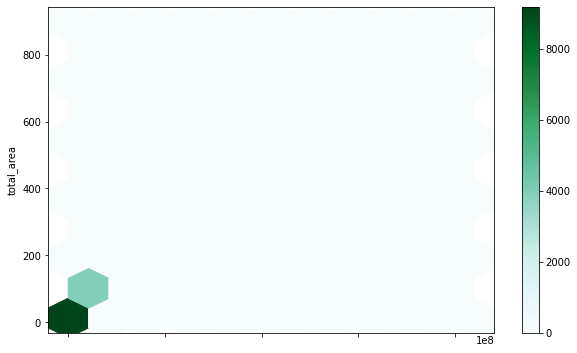

In [ ]:
data.plot(kind='hexbin', x='last_price', y='total_area', gridsize=10, figsize=(10,6));

## Зависимость цены от жилой площади
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)

,last_price,living_area
last_price,1.000000,0.606797
living_area,0.606797,1.000000


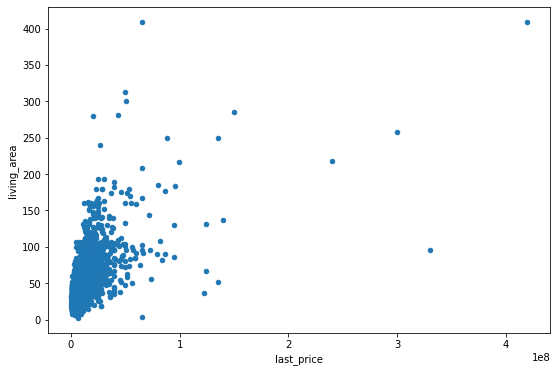

In [ ]:
data.plot(kind='scatter', x='last_price', y='living_area', figsize=(9,6));
data[['last_price', 'living_area']].corr()

<pre>
Есть зависимость цены от жилой площади. Но уже поменьше чем от общей площади. 
Чем больше площадь, тем больше цена.
Но есть и точечные исключения, у которых плщадь такая же, 
но цена слишком завышена по сравнению с другим колличеством квартир с такой же площадью.
Корреляция = 0,6
</pre>

## Зависимость цены от площади кухни
- last_price — цена на момент снятия с публикации
- kitchen_area — площадь кухни в квадратных метрах (м²)

,last_price,kitchen_area
last_price,1.000000,0.561077
kitchen_area,0.561077,1.000000


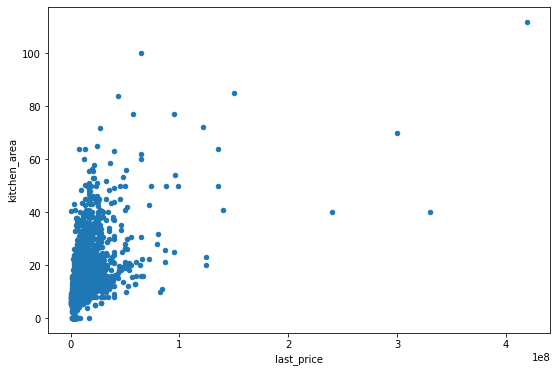

In [ ]:
data.plot(kind='scatter', x='last_price', y='kitchen_area', figsize=(9,6));
data[['last_price', 'kitchen_area']].corr()

<pre>
Есть зависимость цены от кухонной площади. Но уже поменьше чем от общей площади. 
Чем больше площадь, тем больше цена.
Но есть и точечные исключения, у которых плщадь такая же, 
но цена слишком завышена по сравнению с другим колличеством квартир с такой же площадью.
Или где площадь большая но цена меньше, чем у других с мешьшей площадью.
Корреляция = 0,5
</pre>

## Зависимость цены от количества комнат
- last_price — цена на момент снятия с публикации
- rooms — число комнат

,last_price,rooms
last_price,1.000000,0.388817
rooms,0.388817,1.000000


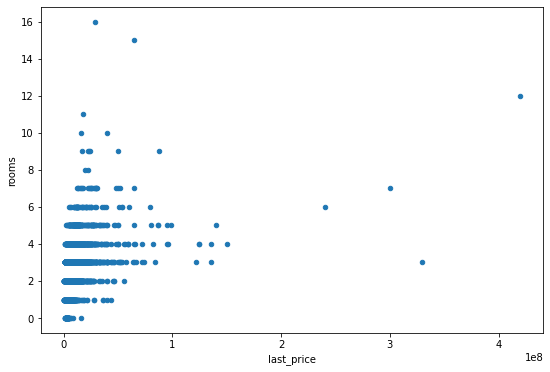

In [ ]:
data.plot(kind='scatter', x='last_price', y='rooms', figsize=(9,6));
data[['last_price', 'rooms']].corr()

<pre>
Здесь зависимость не высокая.
Больше есть косвенная связь с площадью, ведь чем больше площадь, тем больше комнат может быть.
Также есть выбросы. 
Но в основном Если отдельно по комнатам смотреть, то с тем же самым количеством можно купить как дорогие так и не дорогие.
Корреляция 0,4
</pre>

## Зависимость цены от этажа, на котором расположена квартира (первый, последний, другой)
- last_price — цена на момент снятия с публикации
- floor_type

,last_price
last_price,1.0


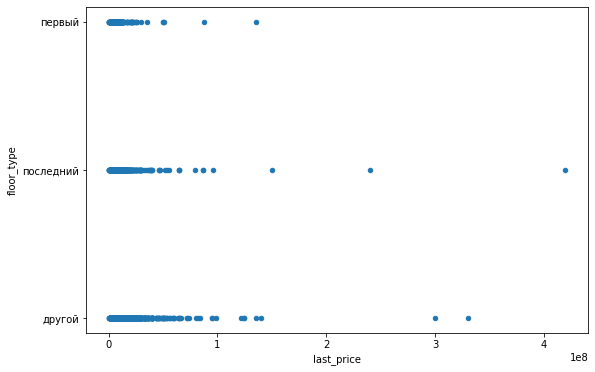

In [ ]:
data.plot(kind='scatter', x='last_price', y='floor_type', figsize=(9,6));
data[['last_price', 'floor_type']].corr()

<pre>
Зависимости нет.
Есть выбросы, и есть диапазон цен. 
Самый маленький диапазон цен на первом этаже. То есть разброс по ценам там минимальный из всех
Самый большой разброс цен в квартирах между этажами. Можно кумить за дешево и за очень дорого.
</pre>

#### Зависимость цены от даты размещения (день недели, месяц, год)
- last_price — цена на момент снятия с публикации
- first_day_exposition — дата публикации
- exposition_day_of_week
- exposition_month
- exposition_year

,last_price,exposition_day_of_week
last_price,1.000000,-0.017026
exposition_day_of_week,-0.017026,1.000000


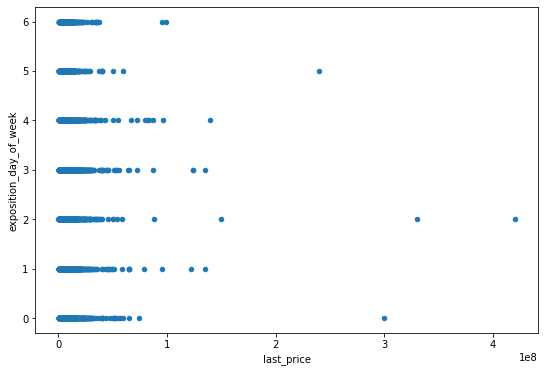

In [ ]:
data.plot(kind='scatter', x='last_price', y='exposition_day_of_week', figsize=(9,6));
data[['last_price', 'exposition_day_of_week']].corr()

,last_price,exposition_month
last_price,1.000000,0.008377
exposition_month,0.008377,1.000000


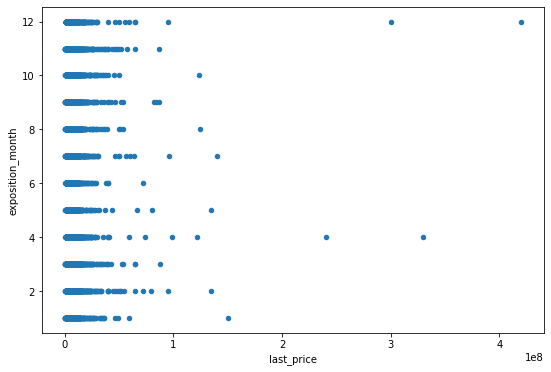

In [ ]:
data.plot(kind='scatter', x='last_price', y='exposition_month', figsize=(9,6));
data[['last_price', 'exposition_month']].corr()

,last_price,exposition_year
last_price,1.000000,-0.045005
exposition_year,-0.045005,1.000000


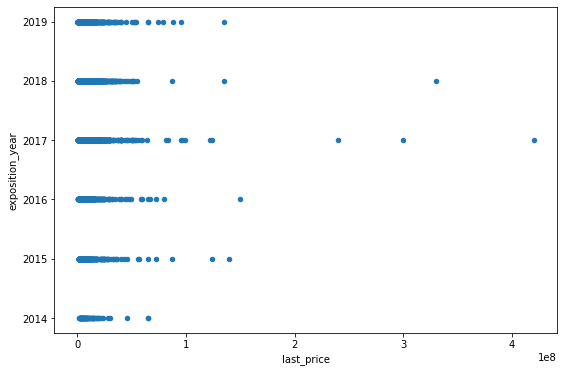

In [ ]:
data.plot(kind='scatter', x='last_price', y='exposition_year', figsize=(9,6));
data[['last_price', 'exposition_year']].corr()

<pre>
Зависимости нет.
Что за день, что за месяц, что за год корреляция = 0 
Что не удивительно. И без графиков понятно, дата публикации к цене за квартиру влияния не имеет.
</pre>

## цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
- населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- locality_name — название населённого пункта
- price_per_meter

In [118]:
top_10 = data['locality_name'].value_counts().head(10).index

In [150]:
price_per_meter = data.query('locality_name.isin(@top_10)').groupby('locality_name')['locality_name','price_per_meter'].median()
price_per_meter.reset_index(inplace=True)
price_per_meter

C:\Users\satfa\AppData\Local\Temp/ipykernel_17936/3981845191.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_per_meter = data.query('locality_name.isin(@top_10)').groupby('locality_name')['locality_name','price_per_meter'].median()


,locality_name,price_per_meter
0,всеволожск,65789.470
1,выборг,58307.690
2,гатчина,67796.610
3,деревня кудрово,91860.470
4,колпино,74723.745
5,поселок мурино,86059.295
6,поселок парголово,91642.860
7,поселок шушары,76829.270
8,пушкин,100000.000
9,санкт-петербург,104794.200


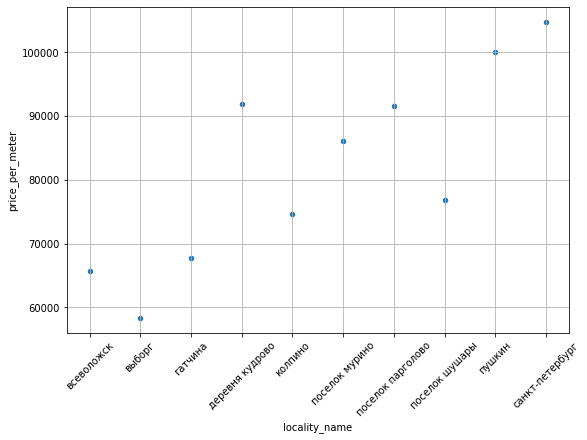

In [151]:
price_per_meter.plot(kind='scatter', x='locality_name', y='price_per_meter', rot=45, figsize=(9,6), grid=True);

,price_per_meter
count,18905.00
mean,109040.06
std,50408.73
min,111.83
25%,86065.57
50%,100436.68
75%,119808.31
max,1907500.00


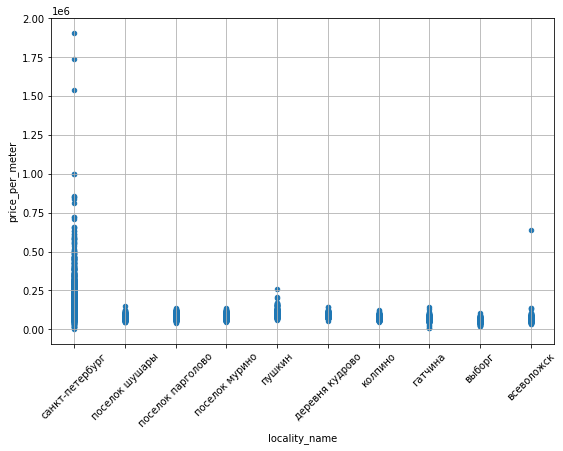

In [119]:
data.loc[data['locality_name'].isin(top_10)][['locality_name', 'price_per_meter']].plot(kind='scatter', x='locality_name', y='price_per_meter', rot=45, figsize=(9,6), grid=True);
data.loc[data['locality_name'].isin(top_10)][['locality_name', 'price_per_meter']].describe().round(decimals=2)

<pre>
Самые низкие и высокие цены за м2 в Санкт-Петербурге, от 112 до 500 000 руб/м2. Плюс редкие выбросы от 600 000 до 1 736 842 руб/м2
Средняя арифметическая сумма за м2 109 189.58.
В Петергофе, Мурино, Колпино, Шушары диапазон цен примерно одинаковый, максимальная около 100 000 р.м2
Гатчина и Всеволожск входят в группу с самыми низкими начальными ценами за м2.
Из всех 10 пунктов только Петербург преодолел отметку в 250 000 р/м2.
</pre>

## Зависимость стоимости от центра города в Санкт-Петербурге.
- Средняя цена каждого киллометра до центра в Санкт-Петербурге
- cityCenters_nearest_km
- график средней цены на каждом километре

In [158]:
tmp_km = data.query('cityCenters_nearest_km > 0 and locality_name == "санкт-петербург"')
tmp_km['price_per_km_to_center'] = (tmp_km['last_price']/tmp_km['cityCenters_nearest_km']).round(2)
tmp_km[['last_price', 'price_per_meter', 'cityCenters_nearest_km', 'price_per_km_to_center', 'locality_name']]

C:\Users\satfa\AppData\Local\Temp/ipykernel_17936/1459474265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp_km['price_per_km_to_center'] = (tmp_km['last_price']/tmp_km['cityCenters_nearest_km']).round(2)


,last_price,price_per_meter,cityCenters_nearest_km,price_per_km_to_center,locality_name
0,13000000.0,120370.37,16.0,812500.00,санкт-петербург
2,5196000.0,92785.71,14.0,371142.86,санкт-петербург
3,64900000.0,408176.10,7.0,9271428.57,санкт-петербург
4,10000000.0,100000.00,8.0,1250000.00,санкт-петербург
7,7915000.0,110544.69,12.0,659583.33,санкт-петербург
...,...,...,...,...,...
23689,3550000.0,100566.57,16.0,221875.00,санкт-петербург
23690,5500000.0,105769.23,6.0,916666.67,санкт-петербург
23691,9470000.0,129903.98,4.0,2367500.00,санкт-петербург
23694,9700000.0,72490.85,4.0,2425000.00,санкт-петербург


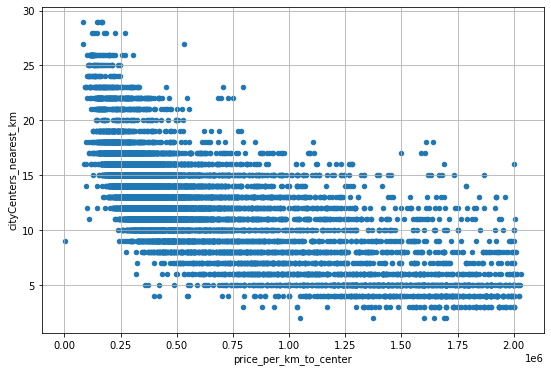

In [161]:
q1_per_km = tmp_km['price_per_km_to_center'].describe()['25%']
q3_per_km = tmp_km['price_per_km_to_center'].describe()['75%']
iqr_per_km = q3_per_km - q1_per_km
low_lim_per_km = q1_per_km - 1.5 * iqr_per_km
up_lim_per_km = q3_per_km + 1.5 * iqr_per_km
tmp_km = tmp_km.query('@low_lim_per_km < price_per_km_to_center < @up_lim_per_km')
tmp_km.plot(kind='scatter', x='price_per_km_to_center', y='cityCenters_nearest_km', figsize=(9,6), grid=True);

,price_per_km_to_center,cityCenters_nearest_km
count,17125.00,17125.00
mean,inf,14.44
std,NaN,8.54
min,1354.44,0.00
25%,260000.00,10.00
50%,386363.64,13.00
75%,738461.54,16.00
max,inf,66.00


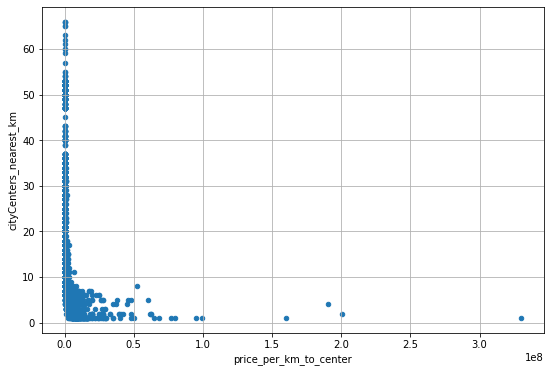

In [120]:
data.plot(kind='scatter', x='price_per_km_to_center', y='cityCenters_nearest_km', figsize=(9,6), grid=True);
data[['price_per_km_to_center', 'cityCenters_nearest_km']].corr()
data[['price_per_km_to_center', 'cityCenters_nearest_km']].describe().round(decimals=2)



<pre>
Есть зависимость того что количество объявлений с большой ценой увиличивается ближе к центру города.
Но она не такая сильная -0.050937.
Средняя цена 6 329 693.1, средний километр 11.42. Получается средняя за километр 554 263 р/км
Но это среднеарифметическая, из-за выбросов лучше смотреть по медиане.
</pre>

<pre>
Были рассмотрены гипотезы по зависимости цены от параметров:
    общей площади;
    жилой площади;
    площади кухни;
    количества комнат;
    этажа, на котором расположена квартира (первый, последний, другой);
    даты размещения (день недели, месяц, год);
    от центра города в Санкт-Петербурге.

Сразу отбросим те гипотезы, которые не подтвердились, корреляция близка к 0:
    этажа, на котором расположена квартира (первый, последний, другой);
    даты размещения (день недели, месяц, год).
На цену эти параметры не влияют, но по ним можно отслеживать нагрузку на систему. 
А для пользователя отслеживать в какие периоды будет больше всего выбора по объявлениям.
Но нас больше интересуе, то что будет влиять на цену.

По этажам влияния на цену нет. Интересны только для статистики. Меньше всего объявлений для первого и последнего этажа,
причем для первого этажа еще меньше чем для второго.
Лидер по количеству объявлений это промежуточный этаж.
Но зависимости от цены нет, могут продоваться как дешево так и дорого для всех этажей.


Все остальные гипотезы подтвердились, снова рассмотрим зависимость вкратце:

Влияние общей площади:
    Корреляция = 0,7
    Чем больше площадь, тем больше цена.

Влияние жилой площади:
    Корреляция = 0,6
    Чем больше площадь, тем больше цена.

Влияние площади кухни:
    Корреляция = 0,5
    Есть зависимость цены от кухонной площади. Но уже поменьше чем от общей площади. 
    Малая зависимость говорит о том, что кухня учитывается не во всех квартирах.
    Например, в студии отдельной кухни не будет. 
    Но там где она есть она дает дополнительную площадь и влияет на цену.
    Чем больше площадь, тем больше цена.

Влияние количества комнат:
    Больше косвенное.
    Корреляция = 0,4
    Так как чем больше комнат, тем больше площади.
    Но если отслеживать именно на уровне количества комнат, то явной зависимости уже нет.
    То есть одно и тоже количество комнат может продоваться как за дешево, так и за дорого.
    Но тенденция с каждой дополнительной комнатой сдвигает цену вправо, на возрастание.

Влияние от центра города в Санкт-Петербурге
    Есть зависимость того что количество объявлений с большой ценой увиличивается ближе к центру города.


Так же была проверена цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
    Из чего можно сделать вывод что больше всего разброса в цене в крупных городах.
    И в крупных городах (Санкт-Петербург) цены за м2 будут намного выше, чем в городах или поселках с меньшим населением.
    Но в маленьких городах цены за м2 приблизительно находятся в одном диапазоне, с примерно одинаковым средним значением.
    Естественно есть населенные пункты где средняя будет меньше, есть где средняя будет выше. 
    Но такого большого разброса как в крупных городах нет.
    Соответственно зависимость от городов миллиоников или от малых населенных пунктов тоже есть.

В итоге чем больше площадь, чем больше комнат, чем ближе к центру города, чем больше город, тем выше цена за квадратный метр.
</pre>